# Import Libraries

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, r2_score

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('customer_shopping_behavior.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


### Explore The Dataset

In [3]:
df.shape

(3900, 18)

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

## Exploratory Data Analysis

In [6]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.fillna(0, inplace=True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
num_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

cat_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

print(len(num_cols))
print(len(cat_cols))

4
13


## Visualization

### 1. Histogram Of Num_Cols

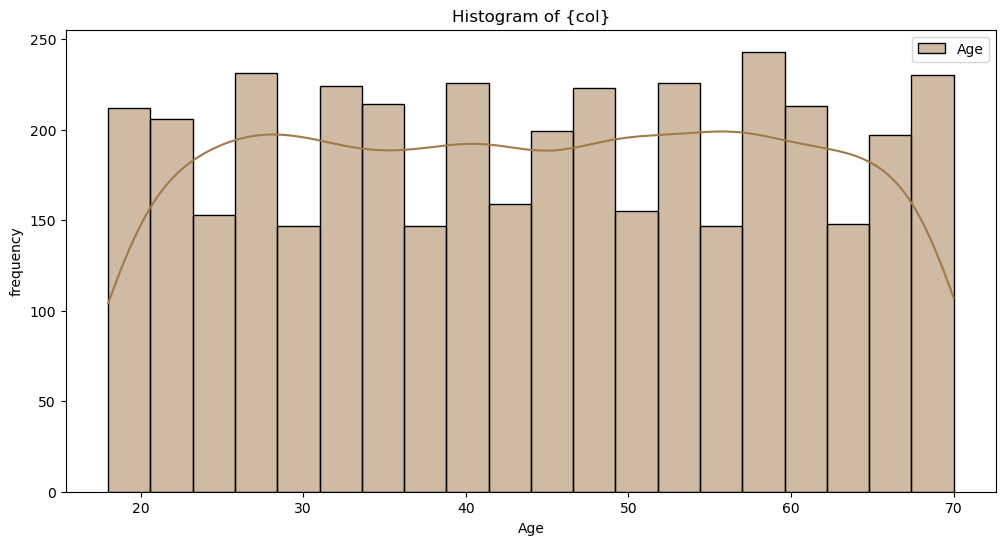

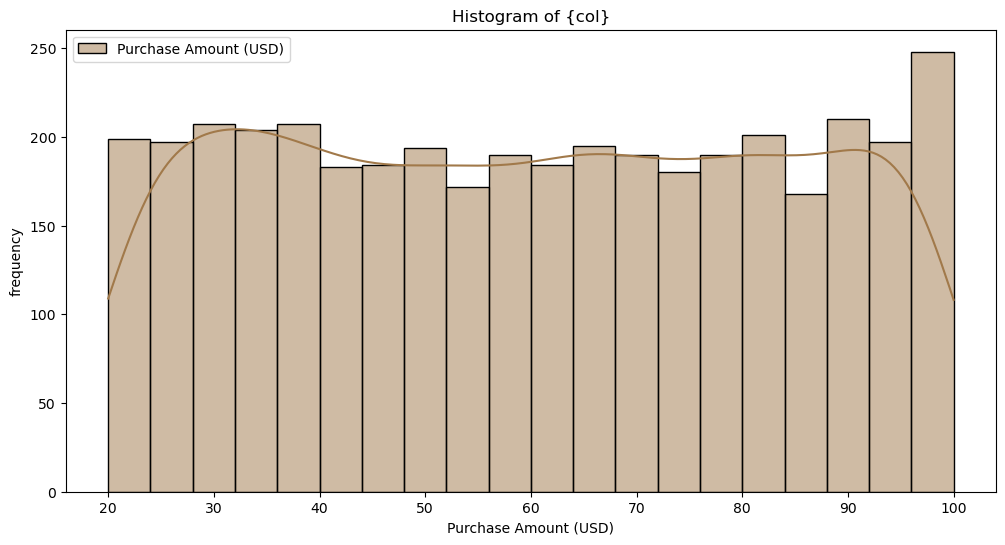

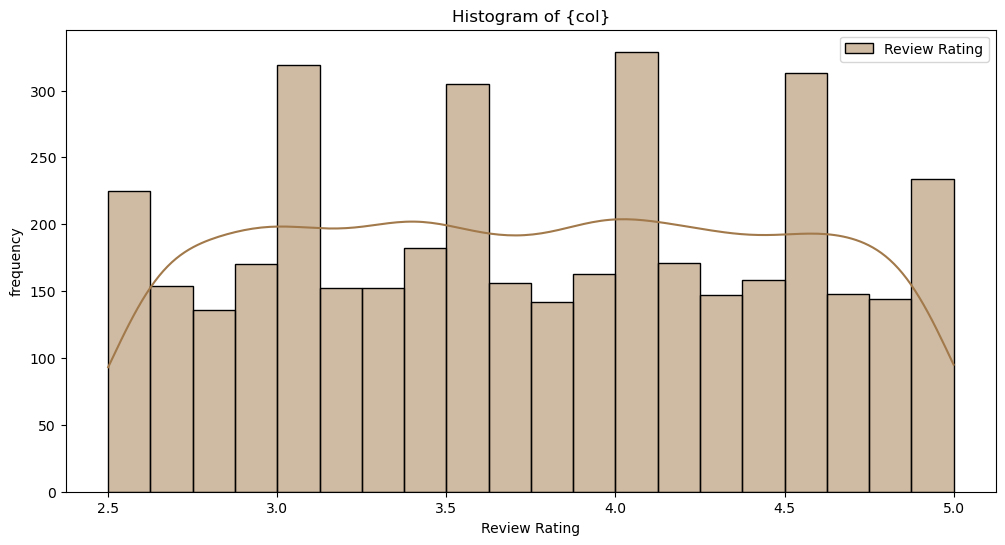

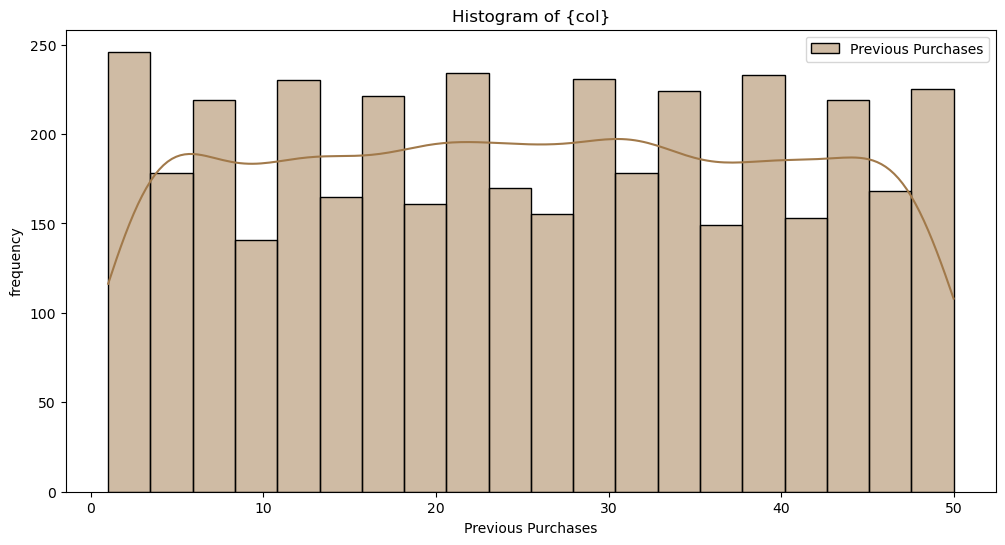

In [11]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='cubehelix', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

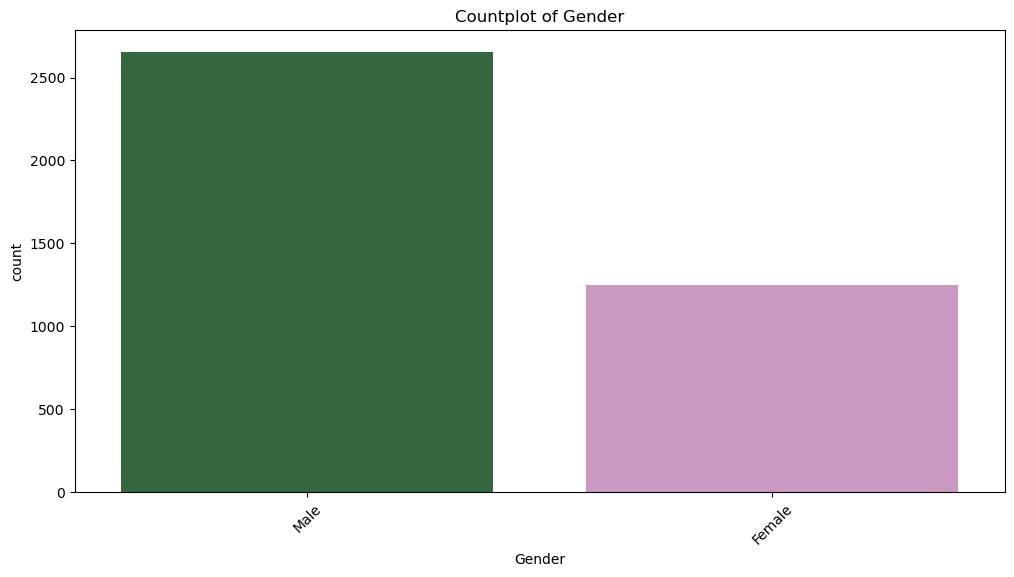

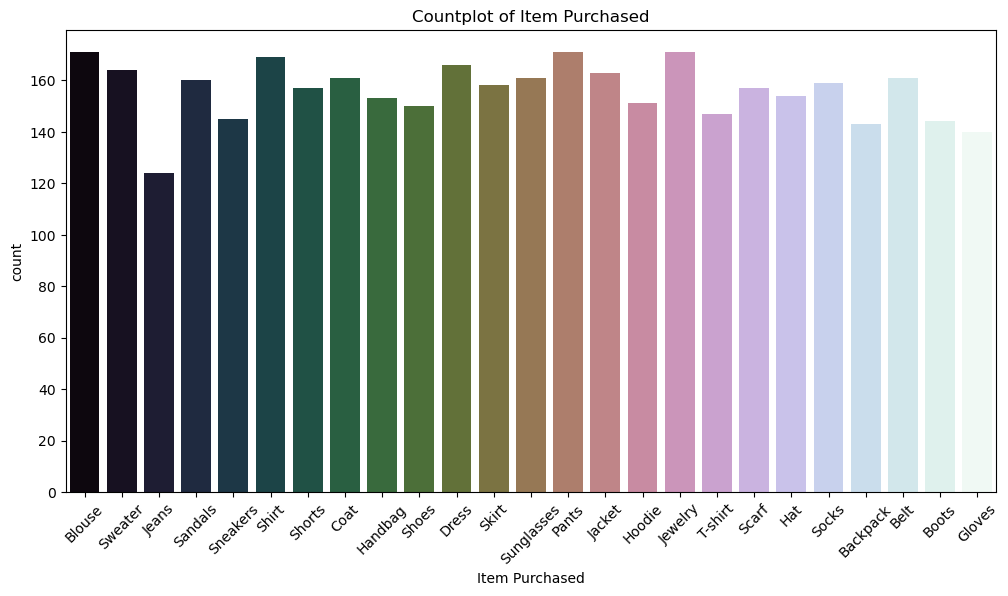

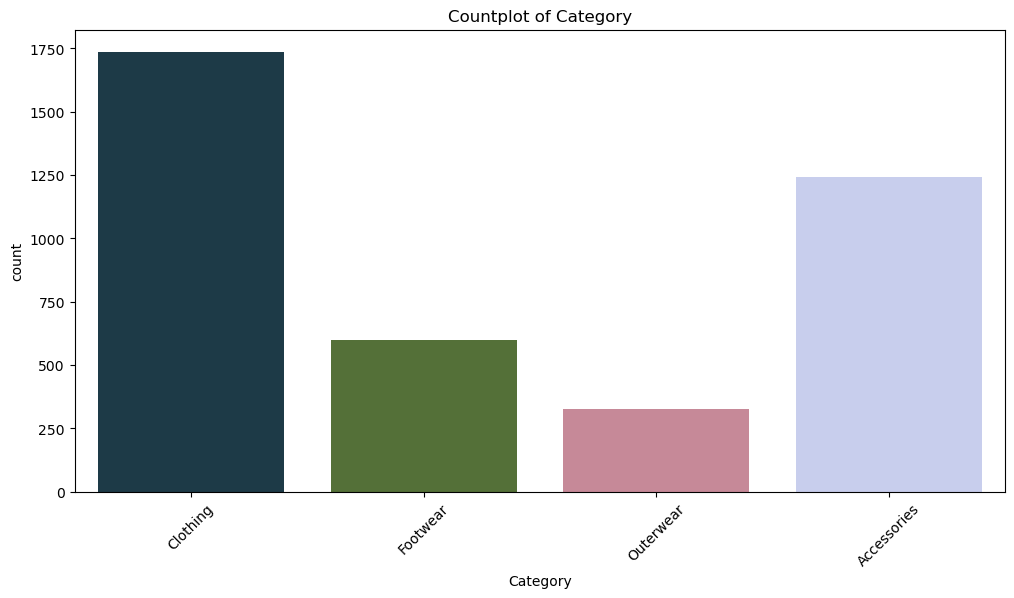

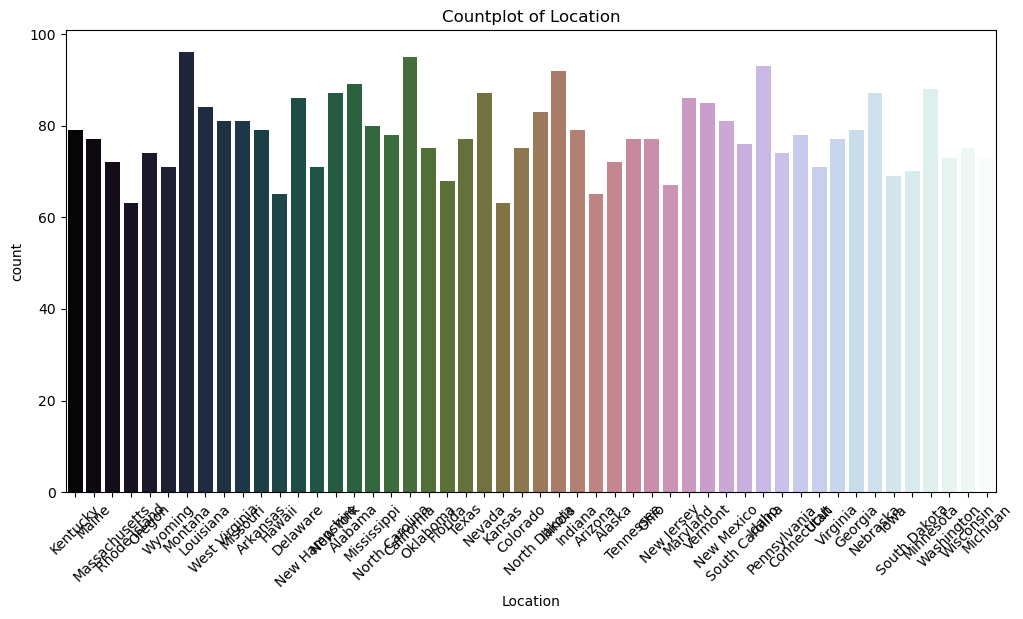

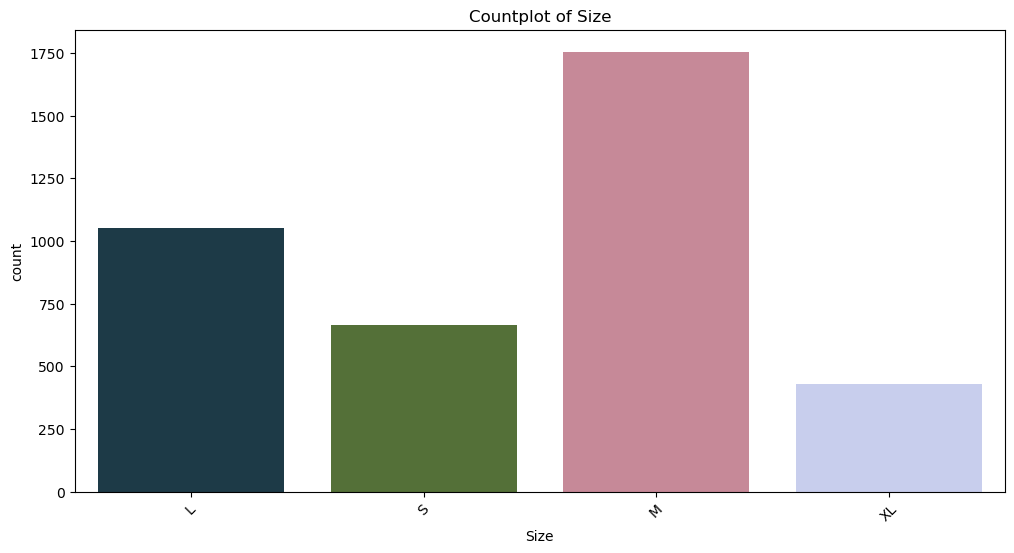

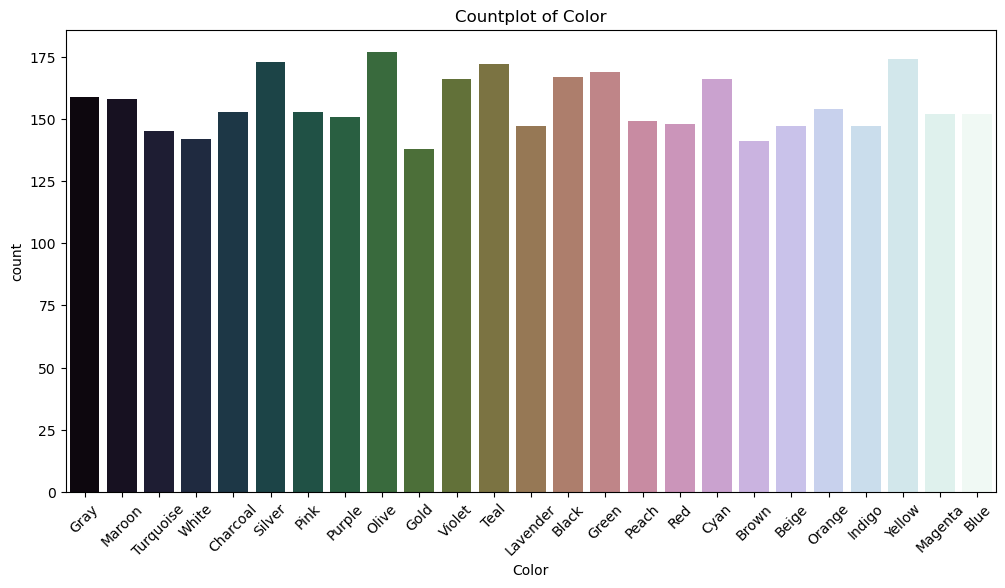

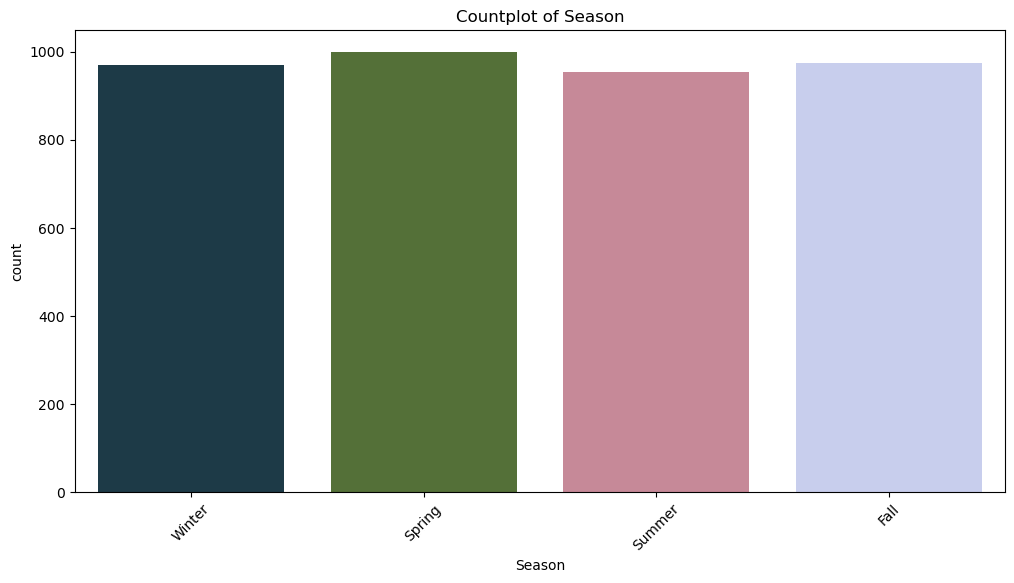

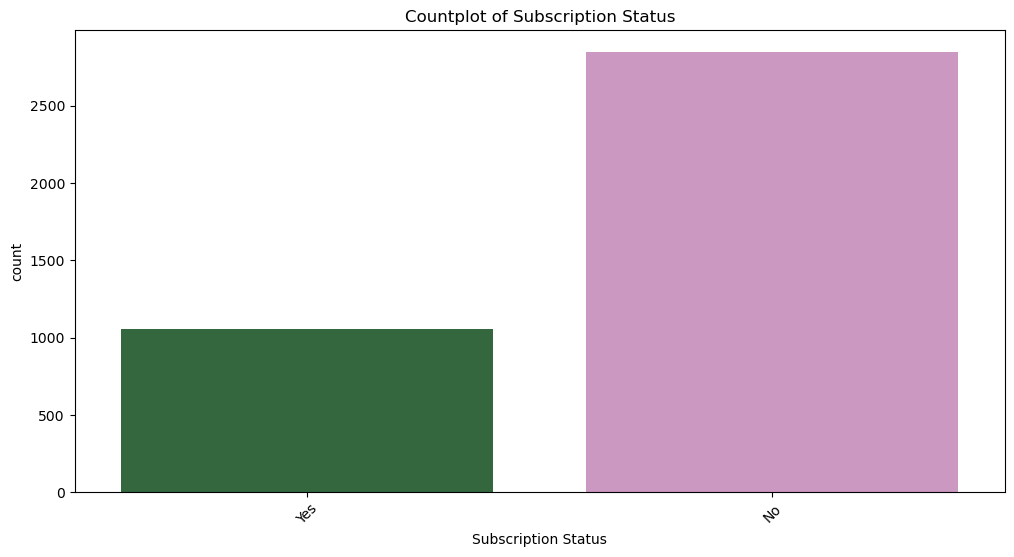

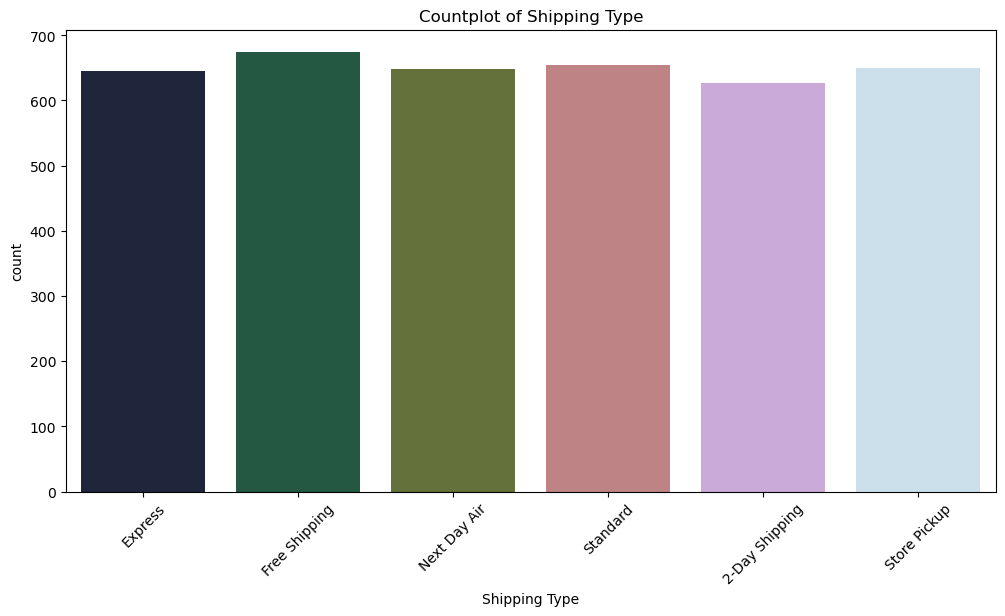

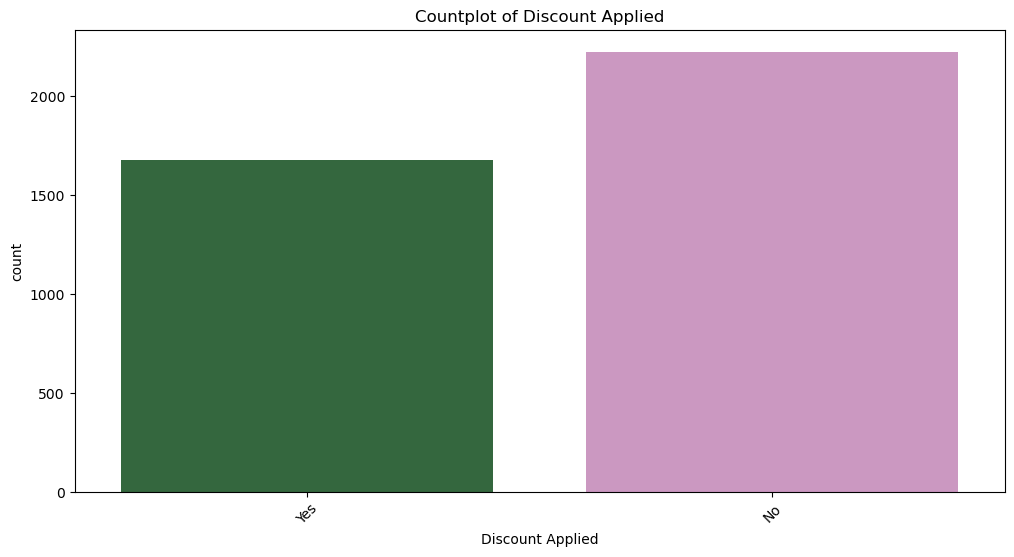

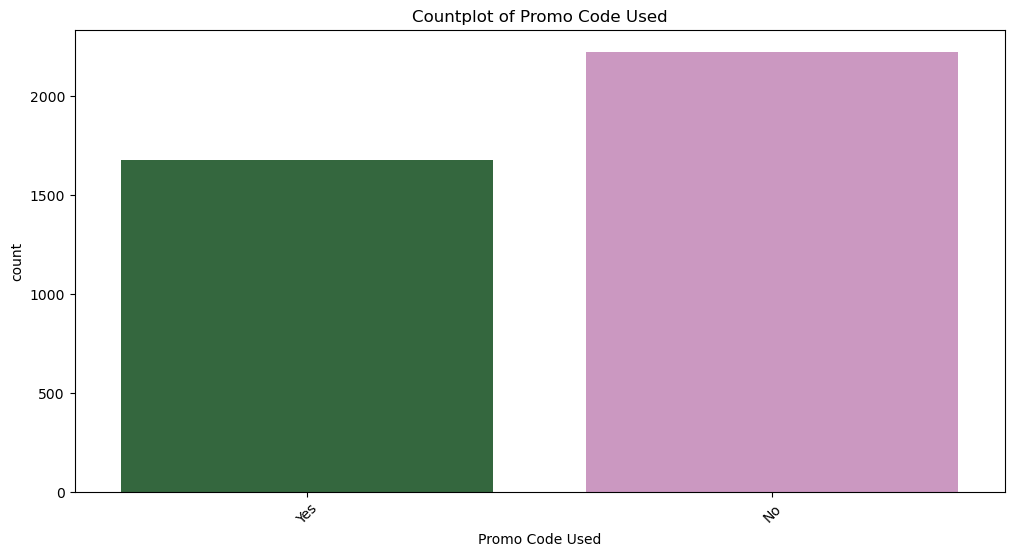

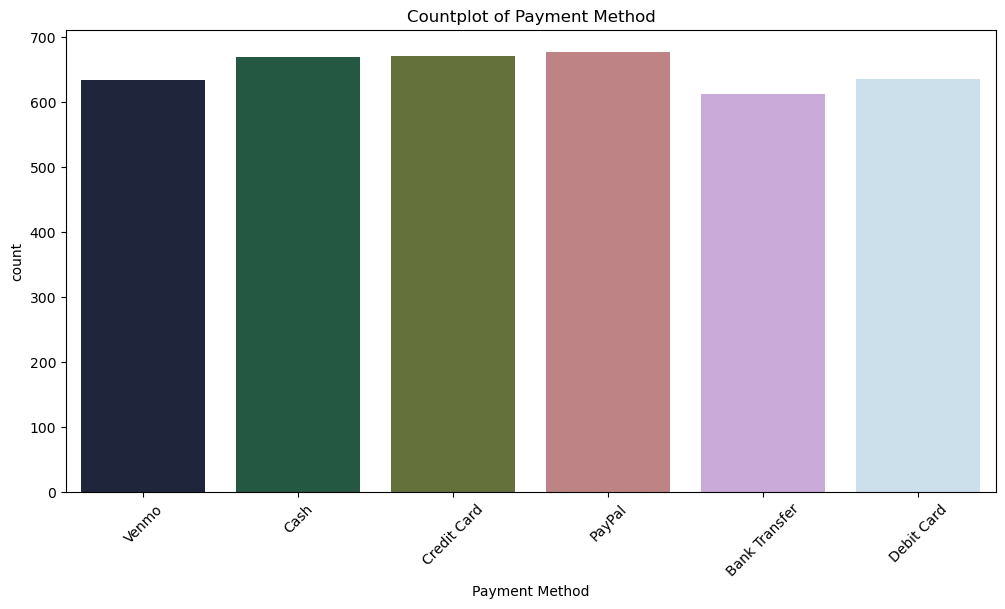

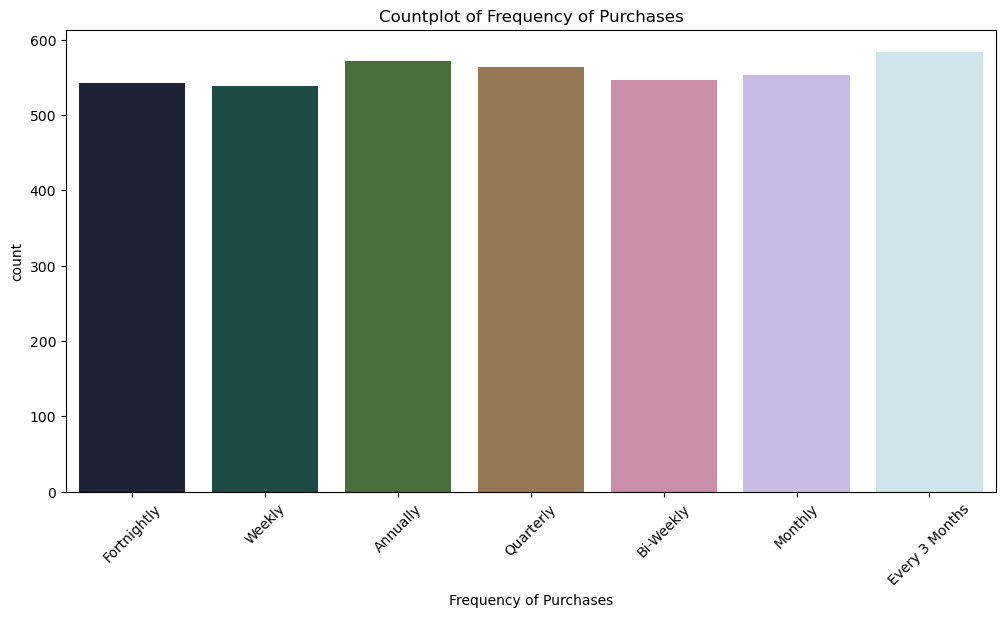

In [27]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='cubehelix')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Purchase Amount USD vs Previous Purchases

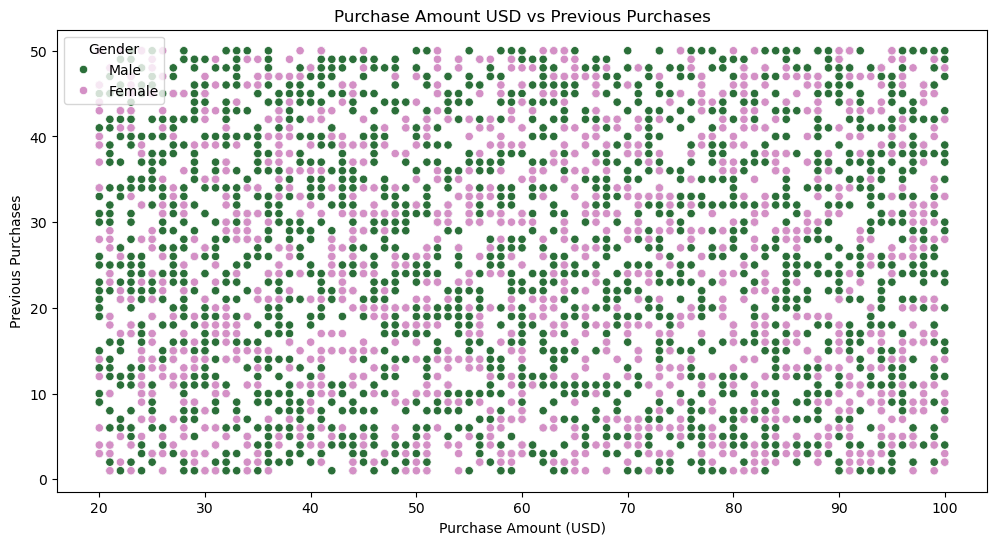

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Purchase Amount (USD)'], y=df['Previous Purchases'], hue=df['Gender'], palette='cubehelix')
plt.title('Purchase Amount USD vs Previous Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.show()

### 4. Age By Purchase Amount USD

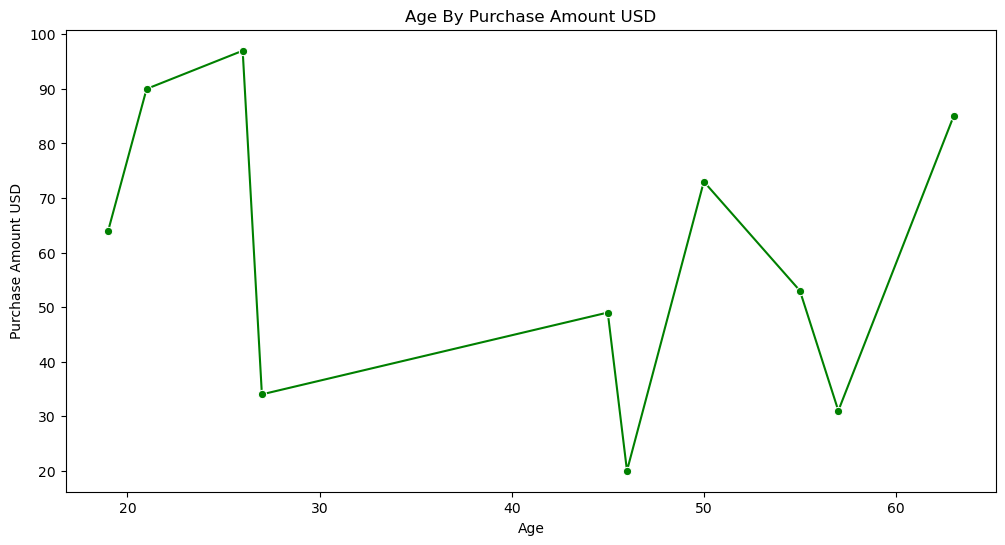

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Age'].head(10), y=df['Purchase Amount (USD)'], marker='o', color='green')
plt.title('Age By Purchase Amount USD')
plt.xlabel('Age')
plt.ylabel('Purchase Amount USD')
plt.show()

### 5. Purchase Amount USD By Category

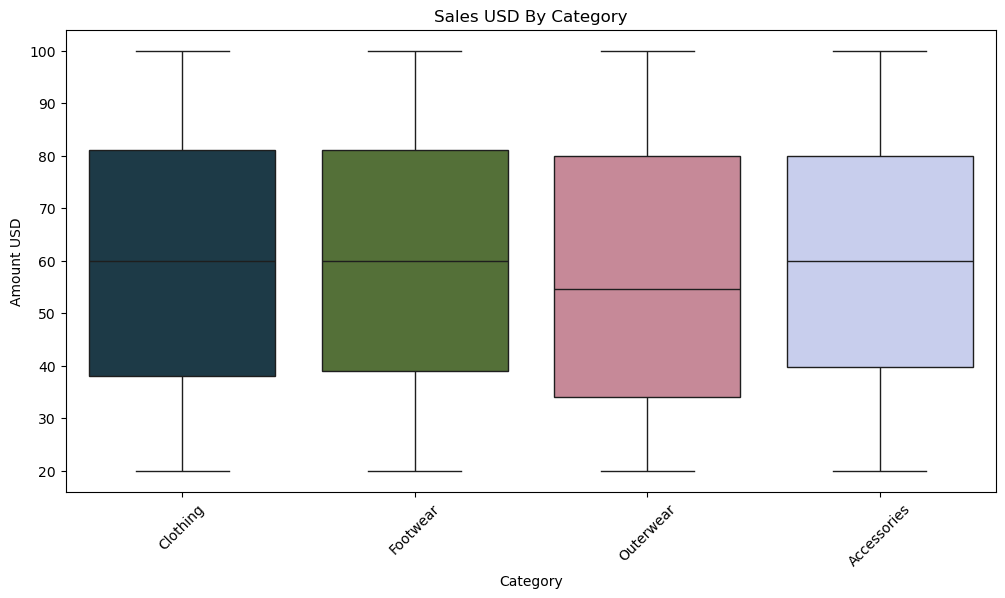

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Category'], y=df['Purchase Amount (USD)'], data=df, palette='cubehelix')
plt.title('Sales USD By Category')
plt.xlabel('Category')
plt.ylabel('Amount USD')
plt.xticks(rotation=45)
plt.show()

### 6. Item Purchased By Gender

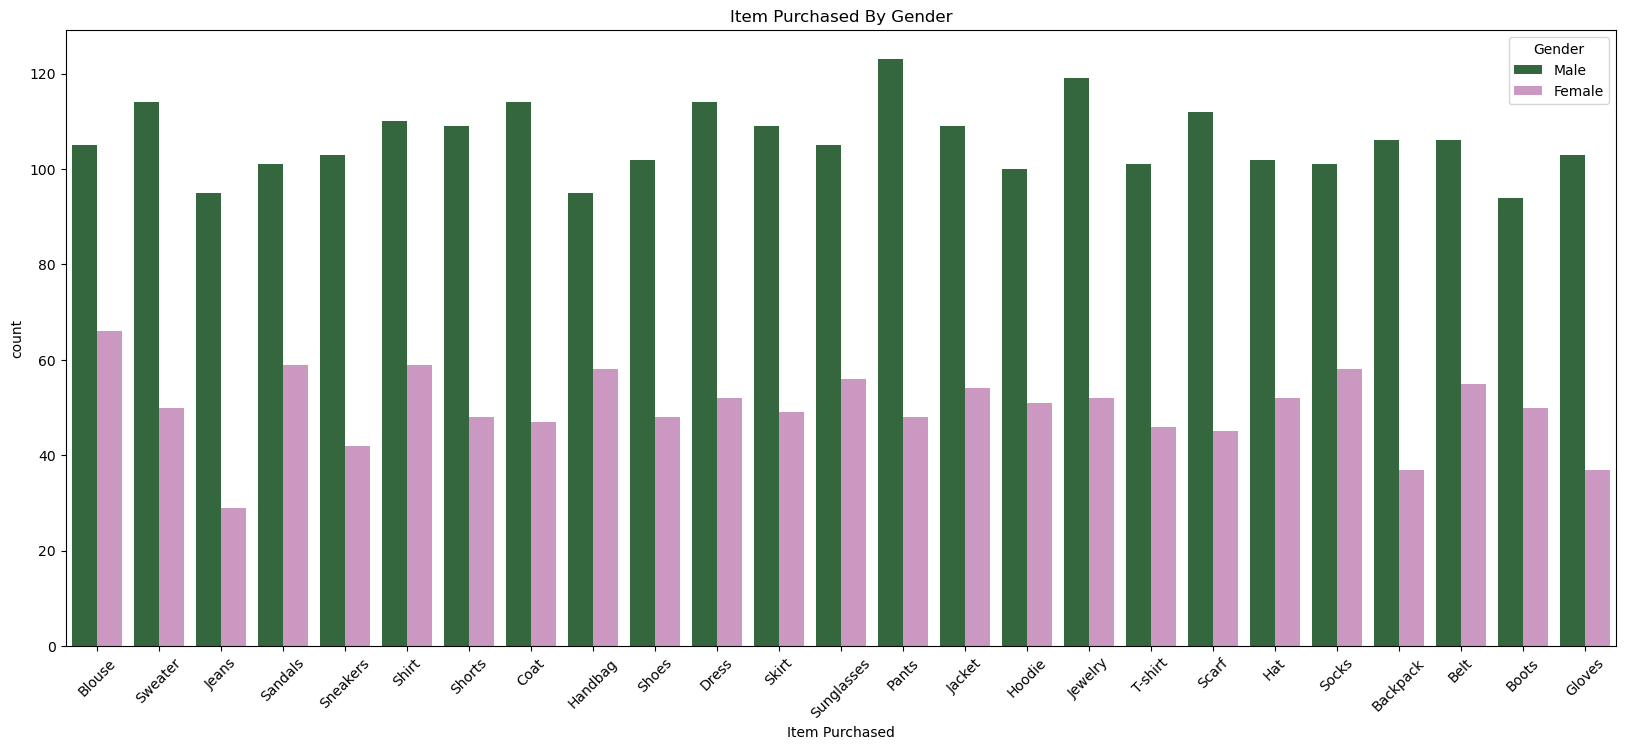

In [33]:
plt.figure(figsize=(20, 8))
sns.countplot(x=df['Item Purchased'], hue=df['Gender'], palette='cubehelix')
plt.title('Item Purchased By Gender')
plt.xlabel('Item Purchased')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### 7. Purchase Amount USD vs Previous Purchases

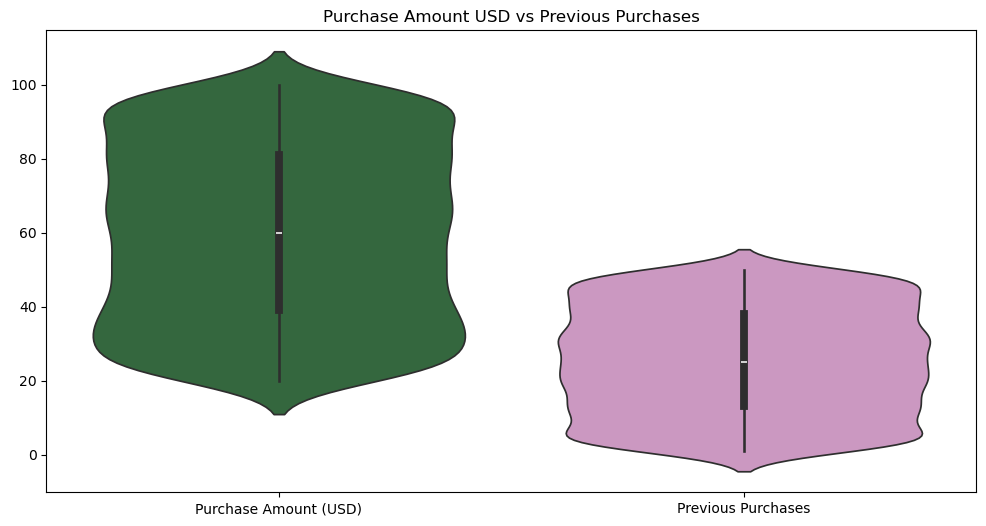

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Purchase Amount (USD)','Previous Purchases']], palette='cubehelix')
plt.title('Purchase Amount USD vs Previous Purchases')
plt.show()

### 8. Correlation Map

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [38]:
correlation = numeric_df.corr()

<Figure size 1500x800 with 0 Axes>

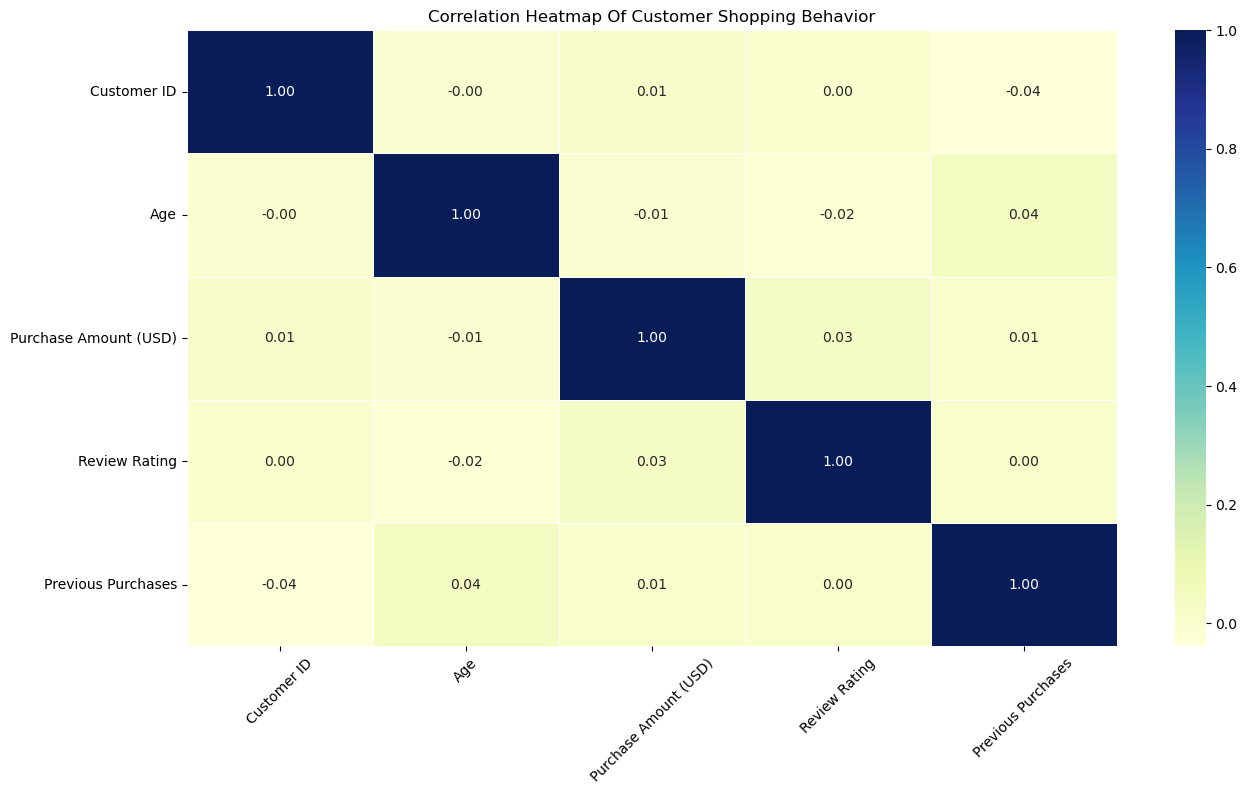

In [39]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Customer Shopping Behavior')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [46]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [48]:
df['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [51]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [53]:
val = {'Category': {'Clothing': 0, 'Footwear': 1, 'Outerwear': 2, 'Accessories': 3}, 
       'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3},
       'Payment Method': {'Venmo': 0, 'Cash': 1, 'Credit Card': 2, 'PayPal': 3, 'Bank Transfer': 4, 'Debit Card': 5},
       'Gender': {'Female': 0, 'Male': 1}
       }
df.replace(val, inplace=True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,0,53,Kentucky,L,Gray,0,3.1,Yes,Express,Yes,Yes,14,0,Fortnightly
1,2,19,1,Sweater,0,64,Maine,L,Maroon,0,3.1,Yes,Express,Yes,Yes,2,1,Fortnightly
2,3,50,1,Jeans,0,73,Massachusetts,S,Maroon,1,3.1,Yes,Free Shipping,Yes,Yes,23,2,Weekly
3,4,21,1,Sandals,1,90,Rhode Island,M,Maroon,1,3.5,Yes,Next Day Air,Yes,Yes,49,3,Weekly
4,5,45,1,Blouse,0,49,Oregon,M,Turquoise,1,2.7,Yes,Free Shipping,Yes,Yes,31,3,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,Hoodie,0,28,Virginia,L,Turquoise,2,4.2,No,2-Day Shipping,No,No,32,0,Weekly
3896,3897,52,0,Backpack,3,49,Iowa,L,White,1,4.5,No,Store Pickup,No,No,41,4,Bi-Weekly
3897,3898,46,0,Belt,3,33,New Jersey,L,Green,1,2.9,No,Standard,No,No,24,0,Quarterly
3898,3899,44,0,Shoes,1,77,Minnesota,S,Brown,2,3.8,No,Express,No,No,24,0,Weekly


In [60]:
val = {'Subscription Status': {'No': 0, 'Yes': 1}}
df.replace(val, inplace=True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,0,53,Kentucky,L,Gray,0,3.1,1,Express,Yes,Yes,14,0,Fortnightly
1,2,19,1,Sweater,0,64,Maine,L,Maroon,0,3.1,1,Express,Yes,Yes,2,1,Fortnightly
2,3,50,1,Jeans,0,73,Massachusetts,S,Maroon,1,3.1,1,Free Shipping,Yes,Yes,23,2,Weekly
3,4,21,1,Sandals,1,90,Rhode Island,M,Maroon,1,3.5,1,Next Day Air,Yes,Yes,49,3,Weekly
4,5,45,1,Blouse,0,49,Oregon,M,Turquoise,1,2.7,1,Free Shipping,Yes,Yes,31,3,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,Hoodie,0,28,Virginia,L,Turquoise,2,4.2,0,2-Day Shipping,No,No,32,0,Weekly
3896,3897,52,0,Backpack,3,49,Iowa,L,White,1,4.5,0,Store Pickup,No,No,41,4,Bi-Weekly
3897,3898,46,0,Belt,3,33,New Jersey,L,Green,1,2.9,0,Standard,No,No,24,0,Quarterly
3898,3899,44,0,Shoes,1,77,Minnesota,S,Brown,2,3.8,0,Express,No,No,24,0,Weekly


In [61]:
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Gender', 'Payment Method', 'Subscription Status', 'Category', 'Season']

target = 'Review Rating'

X = df[features]
y = df[target]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(3120, 8) (780, 8)


### 2. Model

In [66]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'R² Score of the Random Forest Regressor: {score:.4f}')

R² Score of the Random Forest Regressor: -0.0350


### 3. Feature Importance

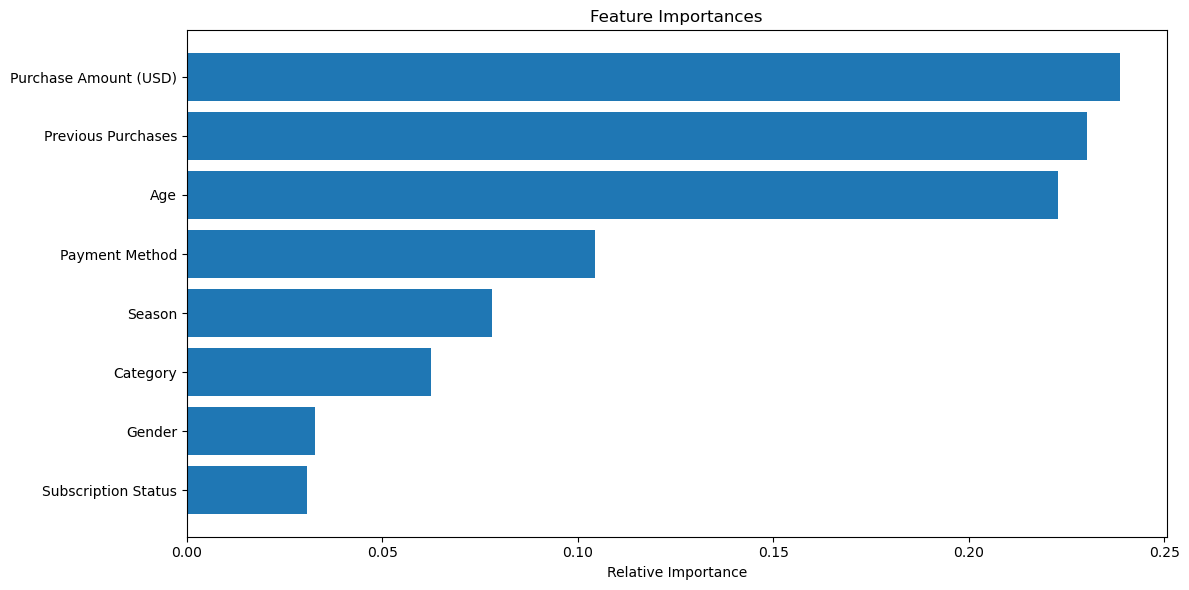

In [71]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()